In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
ds = pd.read_csv('C:/dev/Hackathon_Terra_Signal/data/history.csv')
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerFeedback,MonthlyIncome
0,4578-PHJYZ,Male,0,Yes,Yes,52,Yes,No,DSL,No,...,Yes,No,One year,Yes,Electronic check,68.75,3482.85,No,I have been a customer with this internet prov...,6532
1,6289-CPNLD,Male,0,Yes,Yes,33,Yes,No,DSL,No,...,Yes,Yes,One year,Yes,Mailed check,73.90,2405.05,Yes,I've been a customer with this company for ove...,7634
2,2682-KEVRP,Female,1,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,20.05,417.00,No,I have been a customer with this company for 2...,3628
3,5697-GOMBF,Female,1,Yes,Yes,28,No,No phone service,DSL,No,...,Yes,No,Month-to-month,Yes,Electronic check,35.90,973.65,No,I have been a customer with this internet prov...,7851
4,9717-QEBGU,Male,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.30,144.00,No,I have been using the fiber optic internet ser...,1691


In [8]:
print(ds.isnull().sum())
print(ds.describe())

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        278
Churn                 0
CustomerFeedback      0
MonthlyIncome         0
dtype: int64
       SeniorCitizen  MonthlyCharges  TotalCharges  MonthlyIncome
count    5634.000000     5634.000000   5356.000000    5634.000000
mean        0.164714       64.609523   2271.883150    5104.879304
std         0.370955       30.152186   2253.784765    2839.230500
min         0.000000       18.400000     18.800000     100.000000
25%         0.000000       35.162500    412.900000    2693.750000
50%         0.000000       70.300000   

Churn
No     4130
Yes    1504
Name: count, dtype: int64


C:\Users\ayron\AppData\Local\Temp\ipykernel_42920\2118487478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=ds, palette='coolwarm')


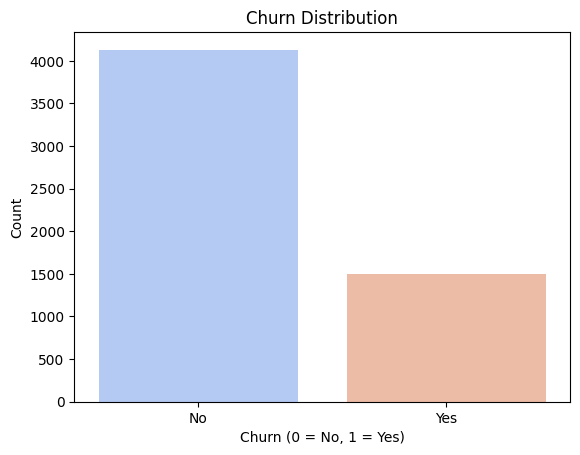

In [10]:
print(ds['Churn'].value_counts())
sns.countplot(x='Churn', data=ds, palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [11]:
ds['TotalCharges'] = pd.to_numeric(ds['TotalCharges'],
errors='coerce')
ds['TotalCharges'] = ds['TotalCharges'].fillna(ds['TotalCharges'].median(),
inplace=True)

C:\Users\ayron\AppData\Local\Temp\ipykernel_42920\3493850809.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds['TotalCharges'] = ds['TotalCharges'].fillna(ds['TotalCharges'].median(),


In [12]:
labelencoder = LabelEncoder()
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]
for col in categorical_cols:
    ds[col] = labelencoder.fit_transform(ds[col])

In [13]:
X = ds.drop(['customerID', 'Churn'], axis=1)
y = ds['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = X_train.drop(columns=['CustomerFeedback'])
X_test = X_test.drop(columns=['CustomerFeedback'])

X_train['tenure'] = pd.to_numeric(X_train['tenure'], errors='coerce')
X_test['tenure']  = pd.to_numeric(X_test['tenure'], errors='coerce')

In [14]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c:\dev\Hackathon_Terra_Signal\.venv\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\dev\Hackathon_Terra_Signal\.venv\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\dev\Hackathon_Terra_Signal\.venv\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [16]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.79


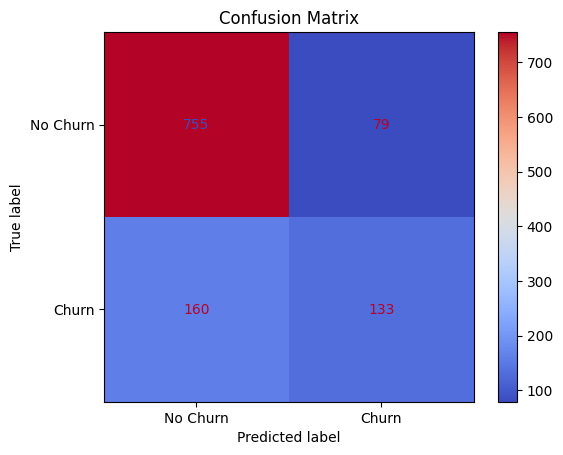

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show()